In [12]:
import fastai_scans
from fastai.basics import *

In [13]:
voxels = (34, 42, 34)

In [14]:
brains_path = '../data/brains_IXI'
targets_path = '../data/targets.csv'
data = (fastai_scans.VolumeItemList.from_paths(Path(brains_path), Path(targets_path))
                                   .split_by_rand_pct(0.2, seed=7)
                                   .label_from_metadata('age_centuries')
                                   .transform(fastai_scans.get_transforms())
                                   .databunch(bs=32)
                                   .normalize())

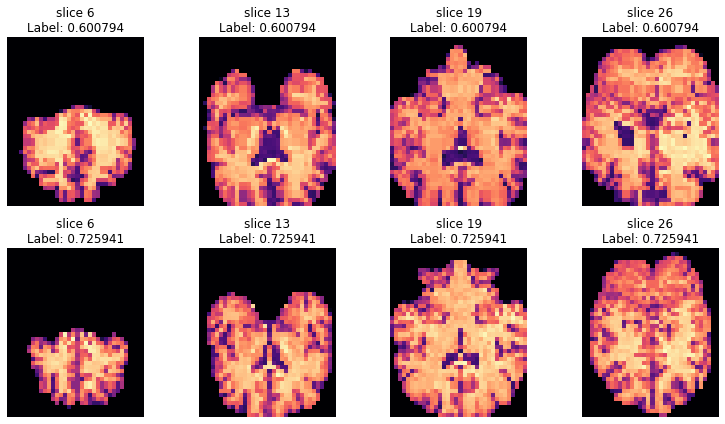

In [15]:
# Show data
data.show_batch(2)

In [16]:
model = fastai_scans.models.ResNet3d(voxels, num_blocks=[1], num_classes=1)
learn = Learner(data, model, metrics=[mean_absolute_error])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.01E-05
Min loss divided by 10: 6.31E-03


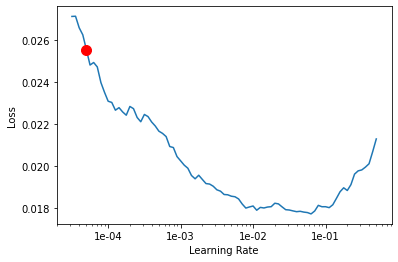

In [17]:
learn.lr_find(start_lr=1e-05, end_lr=1)
learn.recorder.plot(suggestion=True)

In [18]:
learn.fit_one_cycle(50, 1e-2)

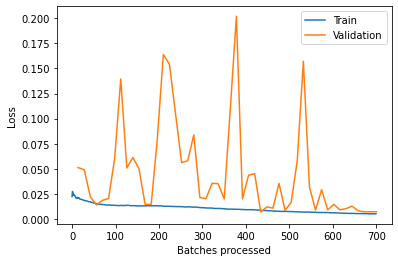

In [19]:
learn.recorder.plot_losses()

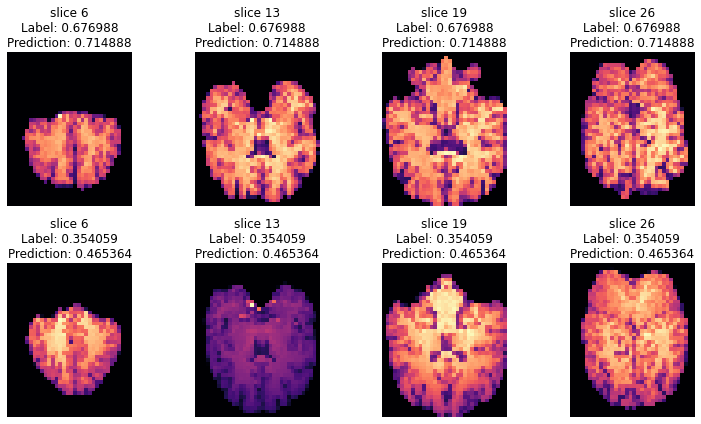

In [20]:
learn.show_results(rows=2)